<a href="https://colab.research.google.com/github/Adityan1512/Coursework-Codes/blob/main/Dissertation_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [56]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dissertation Dataset/Dataset.csv', encoding='latin-1')

In [57]:
df.head(5)

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,Afghanistan,AFG,South Asia,22647496.0,144274031,0.716416,2,43.0,2,4,...,4,4,4.0,1,5.0,1,2,1,0.0,2021
1,Afghanistan,AFG,South Asia,22647496.0,180724554,0.497408,2,55.0,1,3,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
2,Afghanistan,AFG,South Asia,22647496.0,130686682,0.650431,1,15.0,1,2,...,4,4,4.0,4,3.0,2,2,0,0.0,2021
3,Afghanistan,AFG,South Asia,22647496.0,142646649,0.991862,2,23.0,1,4,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
4,Afghanistan,AFG,South Asia,22647496.0,199055310,0.554940,1,46.0,1,1,...,4,4,4.0,4,5.0,2,2,0,0.0,2021


In [58]:
df.columns

Index(['economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt',
       'female', 'age', 'educ', 'inc_q',
       ...
       'receive_transfers', 'receive_pension', 'receive_agriculture',
       'pay_utilities', 'remittances', 'mobileowner', 'internetaccess',
       'anydigpayment', 'merchantpay_dig', 'year'],
      dtype='object', length=128)

In [59]:
#Defining Target Variable - whether the customer would switch or consider opening an account in a challenger bank

df['switch_to_challenger'] = df['account_mob'].apply(lambda x: 1 if x == 1 else 0)

In [60]:
#Defining features & target variable
'''
age - age of the customer
educ - educational background of the customer
inc_q - income quintile
anydigpayment - has the customer ever made a digital payment
borrowed - has the customer ever borrowed money
saved - has the customer ever saved money
'''

df_features = df[['age', 'educ', 'inc_q', 'anydigpayment', 'borrowed', 'saved']]
df_features.fillna(method='ffill', inplace=True)
df_target = df['switch_to_challenger']

<ipython-input-60-fb3f7f34405e>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_features.fillna(method='ffill', inplace=True)
<ipython-input-60-fb3f7f34405e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.fillna(method='ffill', inplace=True)


In [61]:
# Assuming 'educ' needs to be converted from categorical to numerical format
# Creating a dictionary to map the educational levels to numeric values
educ_mapping = {'primary': 1, 'secondary': 2, 'tertiary': 3}
df['educ_1'] = df['educ'].map(educ_mapping)  # Apply mapping to the 'educ' column


# Generating descriptive statistics to get an overview of the dataset's distribution
print("Descriptive Statistics:\n", df_features.describe())

Descriptive Statistics:
                  age           educ          inc_q  anydigpayment  \
count  143887.000000  143887.000000  143887.000000  143887.000000   
mean       41.073641       1.968204       3.234239       0.648856   
std        17.346651       0.723923       1.419803       0.477329   
min        15.000000       1.000000       1.000000       0.000000   
25%        27.000000       1.000000       2.000000       0.000000   
50%        38.000000       2.000000       3.000000       1.000000   
75%        54.000000       2.000000       5.000000       1.000000   
max        99.000000       5.000000       5.000000       1.000000   

            borrowed          saved  
count  143887.000000  143887.000000  
mean        0.525565       0.540563  
std         0.499348       0.498354  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         1.000000       1.000000  
75%         1.000000       1.000000  
max         1.000000       1.000000  


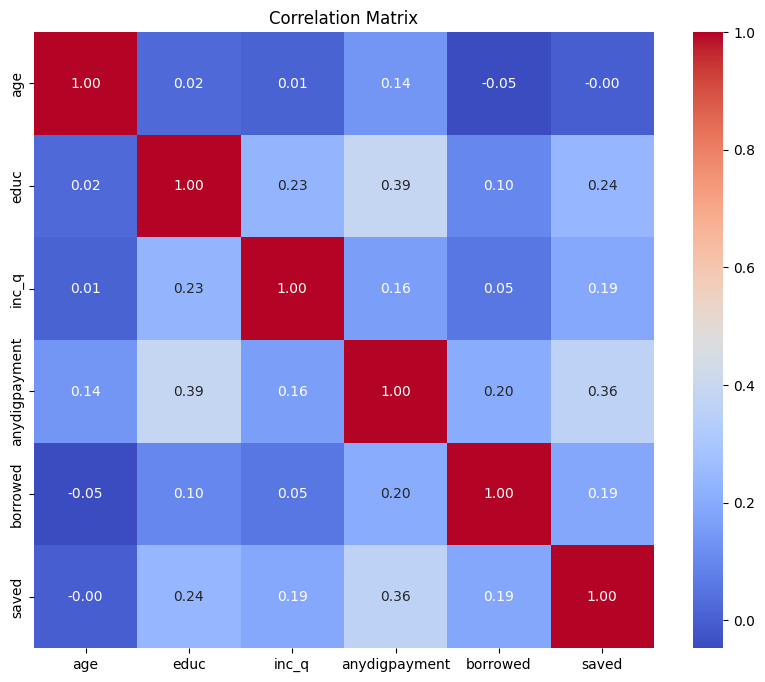

In [62]:
# Creating a correlation matrix to examine the relationships between features
# Correlations close to -1 or 1 indicate strong relationships
corr_matrix = df_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

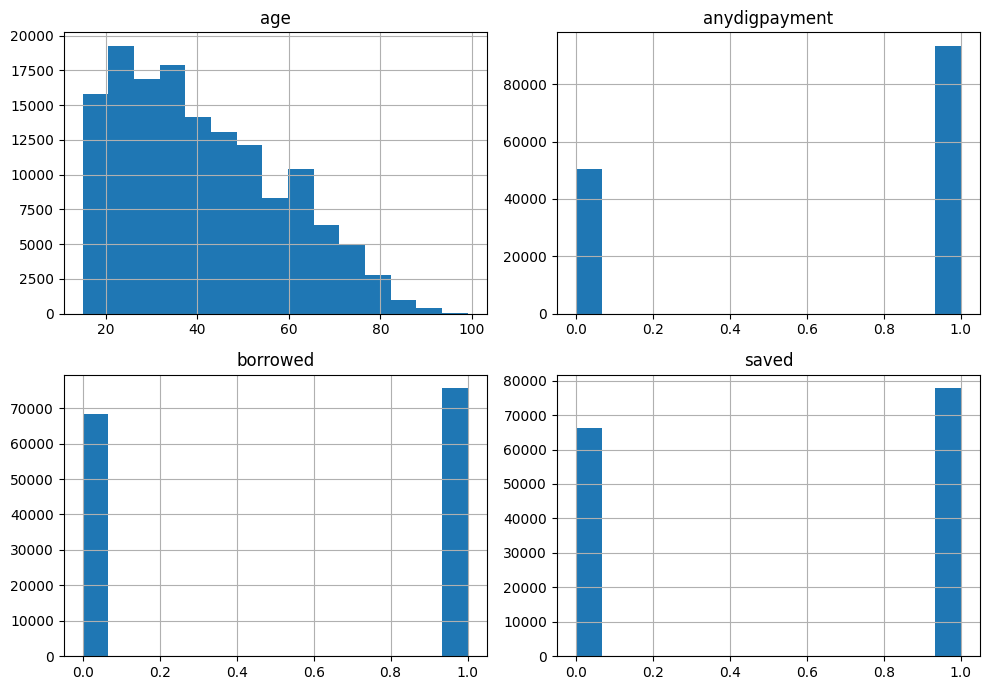

In [65]:
# Plotting histograms for continuous and binary data
# This step helps to visualize the distribution of these variables and detect any skewness or outliers
df[['age', 'anydigpayment', 'borrowed', 'saved']].hist(bins=15, figsize=(10, 7), layout=(2, 2))
plt.tight_layout()
plt.show()

In [68]:
# Printing the variance of each feature to understand the spread of data
# High variance indicates more spread out data
print("\nVariance of Each Feature:\n", df_features.var())

# Printing the skewness of each feature to detect any bias in data distribution
# High skewness indicates a shift or asymmetry in the distribution of data
print("\nSkewness of Each Feature:\n", df_features.skew())


Variance of Each Feature:
 age              300.906285
educ               0.524064
inc_q              2.015840
anydigpayment      0.227843
borrowed           0.249348
saved              0.248356
dtype: float64

Skewness of Each Feature:
 age              0.536709
educ             0.249736
inc_q           -0.216108
anydigpayment   -0.623714
borrowed        -0.102396
saved           -0.162791
dtype: float64


In [17]:
#Splitting the dataset into train & test split

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)

In [18]:
# Initialize the regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
# Storing predictions of the model
predictions = model.predict(X_test)

# Evaluating model performance
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[23852   567]
 [ 3703   656]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     24419
           1       0.54      0.15      0.24      4359

    accuracy                           0.85     28778
   macro avg       0.70      0.56      0.58     28778
weighted avg       0.82      0.85      0.81     28778



In [20]:
# Displaying model coefficients


coefficients = pd.DataFrame({"Feature": df_features.columns, "Coefficient": model.coef_[0]})
print(coefficients.sort_values(by="Coefficient", ascending=False))

         Feature  Coefficient
3  anydigpayment     7.925322
4       borrowed     0.353605
2          inc_q     0.214083
5          saved     0.150262
0            age    -0.049603
1           educ    -0.728901
